## Ejercicios

Autor: Leandro Jorge Fernández Vega

Carrera: Doble Grado en Ingeniería Informática y Matemáticas

Curso: 3º

In [439]:
#Modulos
import sympy as sp
import numpy as np
from decimal import *
from sympy.solvers import solve,nsolve,solveset
from scipy.optimize import fsolve

In [440]:
#Definiciones
x = sp.Symbol('x')
prec=16
getcontext().prec=prec #Precision de las operaciones en coma flotante
precision=10**-16

In [441]:
def Biseccion(f,a,b,tolerancia,precision):

  """
    Metodo de biseccion para aproximar raices de funciones reales.
    f: funcion
    a: extremo inferior del intervalo
    b: extremo superior del intervalo
    tolerancia: criterio de parada por proximidad de valores entre iteraciones consecutivas
    precision: umbral de proximidad de posible raiz
  """

  niter = 0; sale ='';nmax=100 #Maximo iteraciones
  iteraciones=[]

  for k in range(nmax):
      niter = niter + 1;
      c = a + (b-a)/2 # equivalente a c = (a+b)/2
      iteraciones.append(c)

      if abs(f(c)) < precision:
          sale = 'precision'
          break
      if np.sign(f(a)) != np.sign(f(c)):
          b = c
      else:
          a = c
      if b-a < tolerancia:
          sale = 'tolerancia'
          break

  if sale == 'precision':
      print('Posiblemente solución exacta: ',c)
  elif niter < nmax:
      print('Aproximación solicitada: ',c)
  else:
      print('Se llegó al número máximo de iteraciones')
  print('Número total de iteraciones ', niter,'\n')

  return iteraciones

In [442]:
def Regula_Falsi(f,a,b,tolerancia,precision):

  """
    Metodo de biseccion para aproximar raices de funciones reales.
    f: funcion
    a: extremo inferior del intervalo
    b: extremo superior del intervalo
    tolerancia: criterio de parada por proximidad de valores entre iteraciones consecutivas
    precision: umbral de proximidad de posible raiz
  """

  niter = 0; sale ='';nmax=100 #Maximo iteraciones
  iteraciones=[]

  for k in range(nmax):
      niter = niter + 1;
      c = a - (b-a)*f(a)/(f(b)-f(a))
      iteraciones.append(c)

      if abs(f(c)) < precision:
          sale = 'precision'
          break
      if np.sign(f(a)) != np.sign(f(c)):
          b = c
      else:
          a = c
      if b-a < tolerancia:
          sale = 'tolerancia'
          break

  if sale == 'precision':
      print('Posiblemente solución exacta: ',c)
  elif niter < nmax:
      print('Aproximación solicitada: ',c)
  else:
      print('Se llegó al número máximo de iteraciones')
  print('Número total de iteraciones ', niter,'\n')

  return iteraciones

In [443]:
def Whitaker(f,x0,m,tolerancia,precision):

  """
  Metodo de Newton-Raphson para aproximar raices de funciones reales.
    f: funcion
    x0: semilla
    m: pendiente de las rectas por las que se aproxima
    tolerancia: criterio de parada por proximidad de valores entre iteraciones consecutivas
    precision: umbral de proximidad de posible raiz
  """
  niter = 0; sale =''; nmax=100 #Maximo iteraciones

  for k in range(nmax):
      niter = niter + 1;
      x1 = x0 - f(x0)/m
      if abs(x1-x0) < tolerancia:
          sale = 'tolerancia'
          break
      if abs(f(x1)) < precision:
          sale = 'precision'
          break
      else:
          x0 = x1

  print('Sale del programa por ',sale)
  if sale == 'precision':
      print('Posiblemente solución exacta: ',x1)
  elif niter < nmax:
      print('Aproximación solicitada: ', x1)
  else:
      print('Se llegó al número máximo de iteraciones')
  print('Número total de iteraciones ', niter,'\n')

In [444]:
def NR(f,x0,tolerancia,precision):

  """
  Metodo de Newton-Raphson para aproximar raices de funciones reales.
    f: funcion
    x0: semilla
    tolerancia: criterio de parada por proximidad de valores entre iteraciones consecutivas
    precision: umbral de proximidad de posible raiz
  """
  niter = 0; sale =''; nmax=100 #Maximo iteraciones
  iteraciones=[]

  for k in range(nmax):
      niter = niter + 1;
      x1 = x0 - f(x0)/sp.diff(f(x),x).evalf(subs={x:x0})
      iteraciones.append(x1)
      if abs(x1-x0) < tolerancia:
          sale = 'tolerancia'
          break
      if abs(f(x1)) < precision:
          sale = 'precision'
          break
      else:
          x0 = x1

  print('Sale del programa por ',sale)
  if sale == 'precision':
      print('Posiblemente solución exacta: ',x1)
  elif niter < nmax:
      print('Aproximación solicitada: ', x1)
  else:
      print('Se llegó al número máximo de iteraciones')
  print('Número total de iteraciones ', niter,'\n')

  return iteraciones

In [445]:
def Steffensen(f,x0,tolerancia,precision):

  """
  Metodo de Newton-Raphson para aproximar raices de funciones reales.
    f: funcion
    x0: semilla
    tolerancia: criterio de parada por proximidad de valores entre iteraciones consecutivas
    precision: umbral de proximidad de posible raiz
  """
  niter = 0; sale =''; nmax=100 #Maximo iteraciones
  iteraciones=[]

  for k in range(nmax):
      niter = niter + 1;
      x1 = x0 - f(x0)**2/(f(x0+f(x0))-f(x0))
      iteraciones.append(x1)

      if abs(x1-x0) < tolerancia:
          sale = 'tolerancia'
          break
      if abs(f(x1)) < precision:
          sale = 'precision'
          break
      else:
          x0 = x1

  print('Sale del programa por ',sale)
  if sale == 'precision':
      print('Posiblemente solución exacta: ',x1)
  elif niter < nmax:
      print('Aproximación solicitada: ', x1)
  else:
      print('Se llegó al número máximo de iteraciones')
  print('Número total de iteraciones ', niter,'\n')

  return iteraciones

In [446]:
def Secante(f,x0,x1,tolerancia,precision):

  """
  Metodo de Newton-Raphson para aproximar raices de funciones reales.
    f: funcion
    x0,x1: semillas
    tolerancia: criterio de parada por proximidad de valores entre iteraciones consecutivas
    precision: umbral de proximidad de posible raiz
  """
  niter = 0; sale =''; nmax=100 #Maximo iteraciones
  iteraciones=[]

  for k in range(nmax):
      niter = niter + 1;
      x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
      iteraciones.append(x2)

      if abs(x1-x0) < tolerancia:
          sale = 'tolerancia'
          break
      if abs(f(x1)) < precision:
          sale = 'precision'
          break
      else:
          x0,x1 = x1,x2


  print('Sale del programa por ',sale)
  if sale == 'precision':
      print('Posiblemente solución exacta: ',x1)
  elif niter < nmax:
      print('Aproximación solicitada: ', x1)
  else:
      print('Se llegó al número máximo de iteraciones')
  print('Número total de iteraciones ', niter,'\n')

  return iteraciones

In [447]:
def Ac_Aitken(f,xn,tolerancia,precision):

  """
  Metodo de Aceleracion de Aitken para aproximar raices de funciones reales.
    f: funcion
    xn: sucesion a acelerar
    tolerancia: criterio de parada por proximidad de valores entre iteraciones consecutivas
    precision: umbral de proximidad de posible raiz
  """
  acelAitken=[]
  acelAitken.append(xn[0] - (xn[1]-xn[0])**2/(xn[2]-2*xn[1]+xn[0]))
  for k in range(1,len(xn)-2):

    acelAitken.append(xn[k] - (xn[k+1]-xn[k])**2/(xn[k+2]-2*xn[k+1]+xn[k]))

    if abs(acelAitken[k]-acelAitken[k-1])<tolerancia: break
    elif f(acelAitken[k]) < precision: break

  return acelAitken

In [448]:
def Ac_Steffensen(f,x0,tolerancia,precision):

  """
  Metodo de Aceleracion de Steffensen para aproximar raices de funciones reales.
    f: funcion, que debe corresponder a metodo de punto fijo
    x0: semilla
    tolerancia: criterio de parada por proximidad de valores entre iteraciones consecutivas
    precision: umbral de proximidad de posible raiz
  """

  g = lambda x: x - f(x) #Transformamos en metodo de punto fijo

  st = [1]

  iters=[x0,g(x0),g(g(x0))]
  a, b = 0, 1

  while (abs(a - b) >= tolerancia and f(st[-1])<precision):
      x0 = iters[0] - (iters[1] - iters[0])**2/(iters[2] - 2*iters[1]+iters[0])
      x1 = g(x0)
      x2 = g(x1)
      st.append(x0)
      iters = [x0, x1, x2]

      a = st[-1]; b = st[-2]

  return st[1:]

In [449]:
def Ac_NR(f,x0,m,tolerancia,precision):
  """
  Metodo de Newton-Raphson acelerado para aproximar raices multiples de funciones reales.
    f: funcion
    x0: semilla
    m:multiplicidad
    tolerancia: criterio de parada por proximidad de valores entre iteraciones consecutivas
    precision: umbral de proximidad de posible raiz
  """
  niter = 0; sale =''; nmax=100 #Maximo iteraciones
  iteraciones=[]

  for k in range(nmax):
      niter = niter + 1;
      x1 = x0 - m*f(x0)/sp.diff(f(x),x).evalf(subs={x:x0})
      iteraciones.append(x1)
      if abs(x1-x0) < tolerancia:
          sale = 'tolerancia'
          break
      if abs(f(x1)) < precision:
          sale = 'precision'
          break
      else:
          x0 = x1

  print('Sale del programa por ',sale)
  if sale == 'precision':
      print('Posiblemente solución exacta: ',x1)
  elif niter < nmax:
      print('Aproximación solicitada: ', x1)
  else:
      print('Se llegó al número máximo de iteraciones')
  print('Número total de iteraciones ', niter,'\n')

  return iteraciones

In [450]:
def Horner(p, x0):
  """
  Algoritmo de Horner para la evaluacion de polinomios.
  p: polinomio
  x0: punto donde evaluar el polinomio
  """
  coeficientes = sp.Poly(p(x),x).all_coeffs()
  b = coeficientes[0]

  for k in range(1,len(coeficientes)):

      b = coeficientes[k] + b*x0

  return b

In [451]:
def NR_Horner(p,dp,x0,tolerancia,precision):

  """
  Metodo de Newton-Raphson acelerado para aproximar raices de polinomios, evaluando mediante Horner
  p: polinomio
  dp: derivada de p
  x0: semilla
  tolerancia: criterio de parada por proximidad de valores entre iteraciones consecutivas
  precision: umbral de proximidad de posible raiz
  """
  niter = 0; sale =''; nmax=100 #Maximo iteraciones
  iteraciones=[]

  for k in range(nmax):
      niter = niter + 1;
      x1 = x0 - float(Horner(p,x0)/Horner(dp,x0))
      iteraciones.append(x1)

      if abs(x1-x0) < tolerancia:
          sale = 'tolerancia'
          break
      if abs(p(x1)) < precision:
          sale = 'precision'
          break
      else:
          x0 = x1

  print('Sale del programa por ',sale)
  if sale == 'precision':
      print('Posiblemente solución exacta: ',x1)
  elif niter < nmax:
      print('Aproximación solicitada: ', x1)
  else:
      print('Se llegó al número máximo de iteraciones')
  print('Número total de iteraciones ', niter,'\n')

  return iteraciones

In [452]:
def Suc_Sturm(p):

  """
  Algoritmo de construccion de una sucesion de Sturm a partir de un polinomio
  p: polinomio
  """

  sturm = [p(x), sp.diff(p(x),x)]
  i = 1; resto_no_nulo=True

  while sp.degree(sturm[i]) > 0 and resto_no_nulo:
      i += 1
      resto=-(sp.rem(sturm[i-2],sturm[i-1]))
      if (resto!=0):
        sturm.append(resto)
      else:
        for k in (sturm):
          k/sturm[-1]
          resto_no_nulo=False

  return sturm

1.- Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

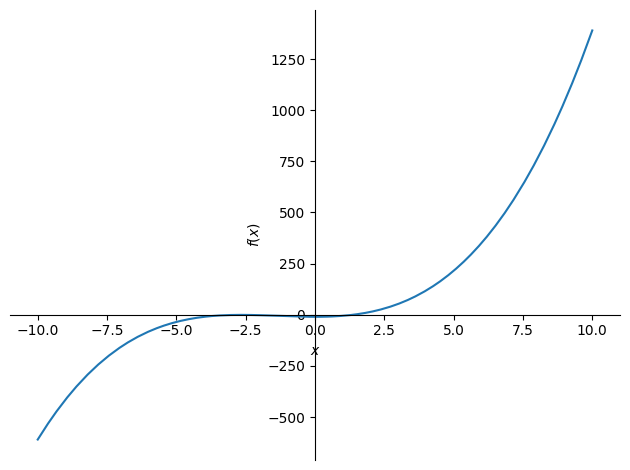

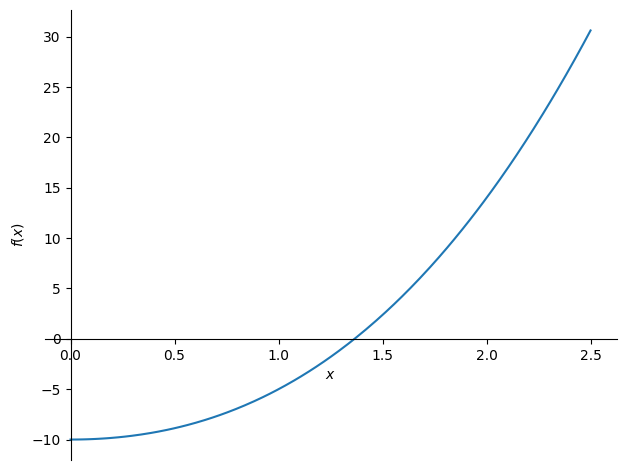

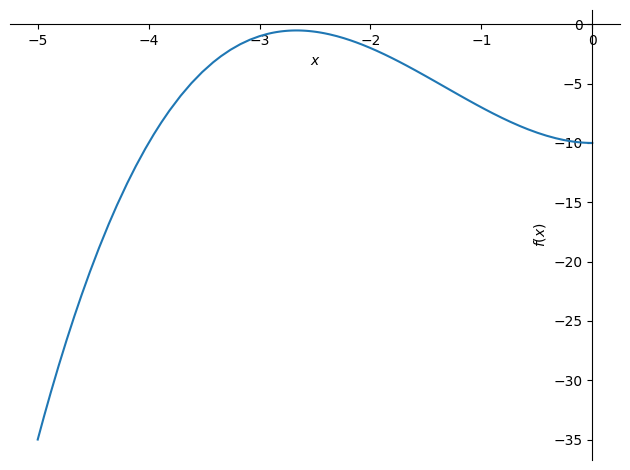

Aproximacion Biseccion con 3 cifras decimales exactas:

Aproximación solicitada:  1.3642578125
Número total de iteraciones  10 

Aproximacion Biseccion con 5 cifras decimales exactas:

Aproximación solicitada:  1.3652267456054688
Número total de iteraciones  17 

Aproximacion N-R con 3 cifras decimales exactas:

Sale del programa por  tolerancia
Aproximación solicitada:  1.36523001371216
Número total de iteraciones  3 



[1.37234042553191, 1.36525467084926, 1.36523001371216]

In [453]:
def f1(x):
  return x**3 + 4*x**2 -10

a,b=1,2 #Extremos del intervalo
x01=1.25

#Comprobamos graficamente que la funcion tiene una raiz en el [1,2].
sp.plot(f1(x))
sp.plot(f1(x),(x,0,2.5))
sp.plot(f1(x),(x,0,-5))

print("Aproximacion Biseccion con 3 cifras decimales exactas:\n"); Biseccion(f1,a,b,10**-3,precision)

print("Aproximacion Biseccion con 5 cifras decimales exactas:\n"); Biseccion(f1,a,b,10**-5,precision)

print("Aproximacion N-R con 3 cifras decimales exactas:\n"); NR(f1,x01,10**-3,precision)

2.- Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos (tol =$10^{-2}$), usando el algoritmo de bisección.

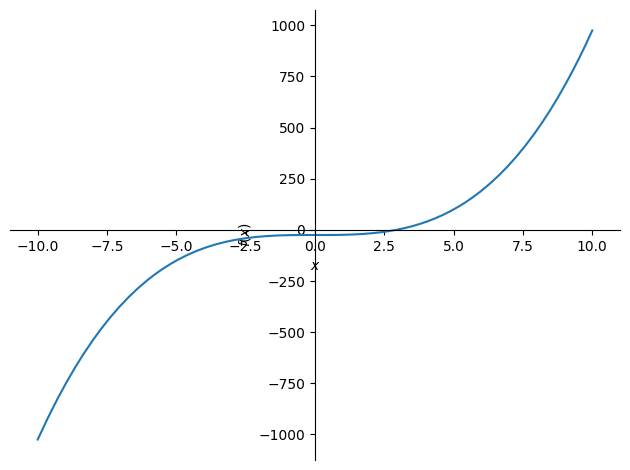

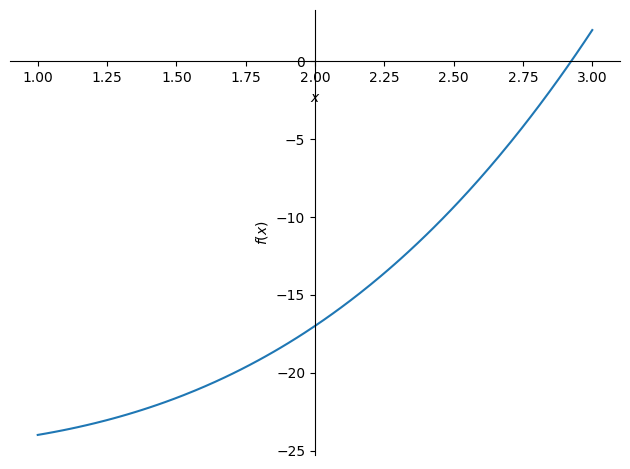

Aproximación solicitada:  2.9296875
Número total de iteraciones  8 



[2.0, 2.5, 2.75, 2.875, 2.9375, 2.90625, 2.921875, 2.9296875]

In [454]:
def f2(x):
  return x**3-25

a,b,x02=1,3,1
tolerancia=10**-2
sp.plot(f2(x))
sp.plot(f2(x),(x,a,b))

Biseccion(f2,a,b,tolerancia,precision)

3.- Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.

In [455]:
tolerancia=10**-5

i) $x^3-x-1 = 0$  en $[1,2]$.

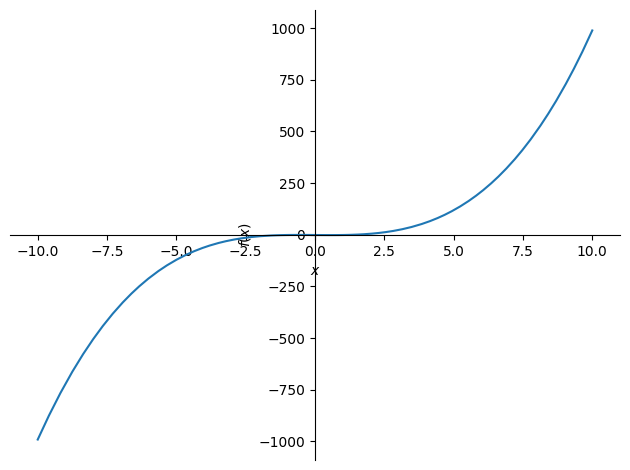

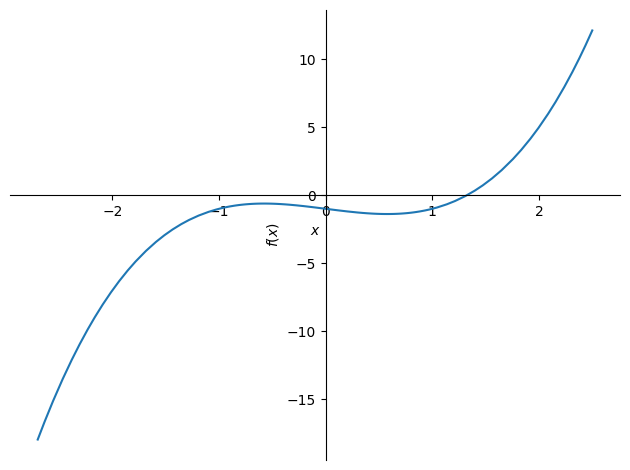

Sale del programa por  tolerancia
Aproximación solicitada:  1.32471795724479
Número total de iteraciones  5 



[1.50000000000000,
 1.34782608695652,
 1.32520039895091,
 1.32471817399905,
 1.32471795724479]

In [456]:
def f3(x):
  return x**3-x-1

a,b,x03=1,2,1

sp.plot(f3(x))
sp.plot(f3(x),(x,-2.7,2.5))

NR(f3,x03,tolerancia,precision)

ii) $3x=2+x^2-e^x$.

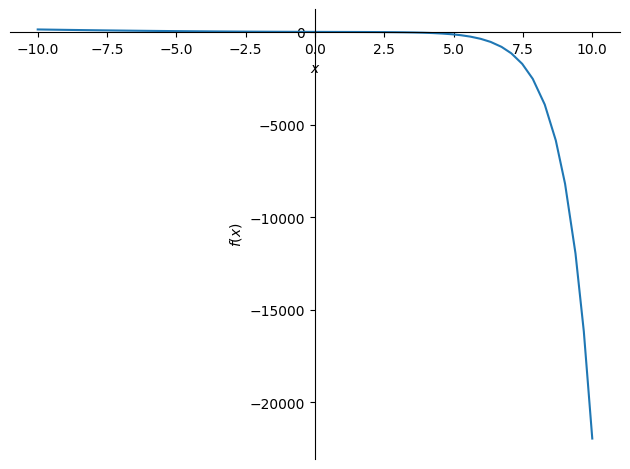

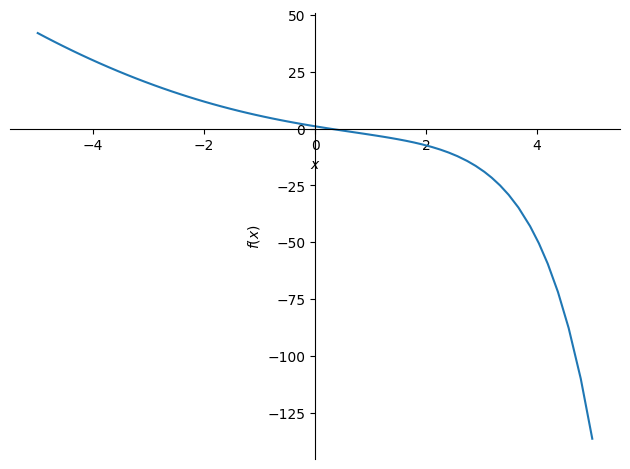

Sale del programa por  tolerancia
Aproximación solicitada:  0.257530285437195
Número total de iteraciones  3 



[0.250000000000000, 0.257524945045740, 0.257530285437195]

In [457]:
def f4(x):
  return x**2-3*x-sp.exp(x)+2

a,b,x04=0,1,0
sp.plot(f4(x))
sp.plot(f4(x),(x,-5,5))


NR(f4,x04,tolerancia,precision)

iii) $x^2+10\, cos x+x=0$.

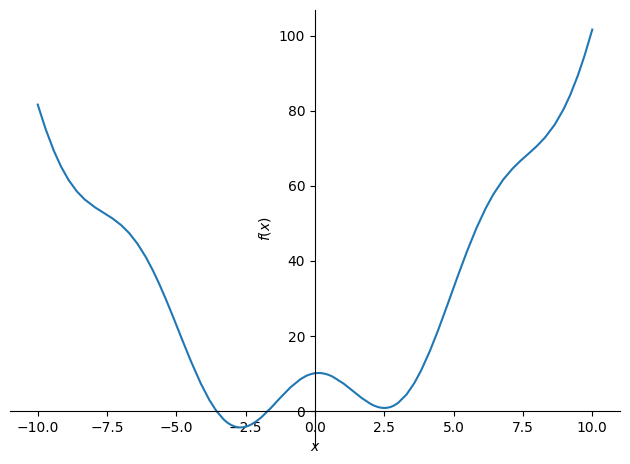

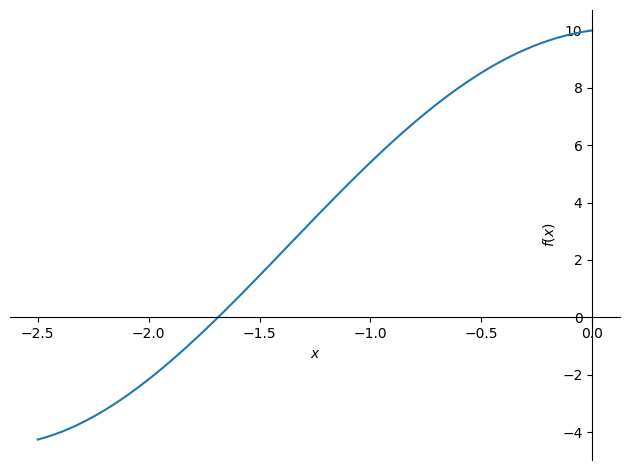

Sale del programa por  tolerancia
Aproximación solicitada:  -1.68693989979647
Número total de iteraciones  3 



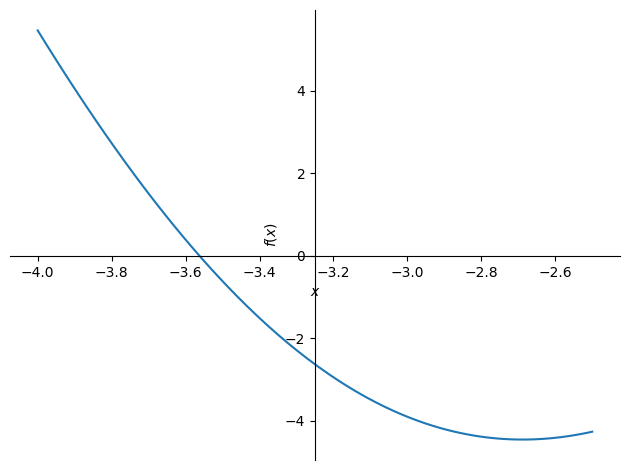

Sale del programa por  tolerancia
Aproximación solicitada:  -3.56233149723645
Número total de iteraciones  3 



[-3.56306745539487, -3.56233179213876, -3.56233149723645]

In [458]:
def f5(x):
  return x**2+10*sp.cos(x)+x

sp.plot(f5(x))

sp.plot(f5(x),(x,-2.5,0))
a,b,x05=-2,-1.5,-1.5
NR(f5,x05,tolerancia,precision)

sp.plot(f5(x),(x,-4,-2.5))
a,b,x05=-5,-2.5,-3.6
NR(f5,x05,tolerancia,precision)

4.- Para la función  $ f(x)= 3 x^2+e^x-1$,

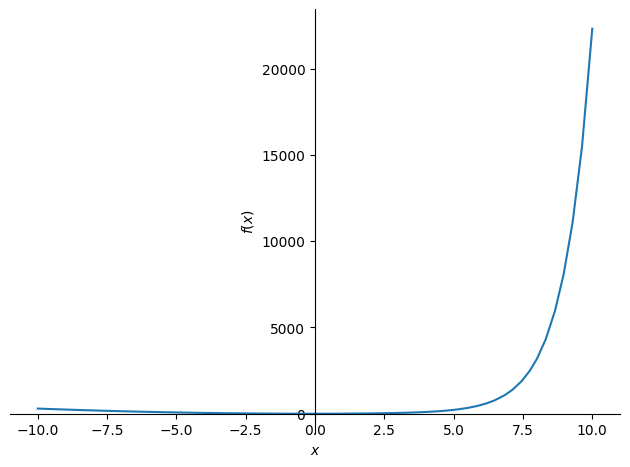

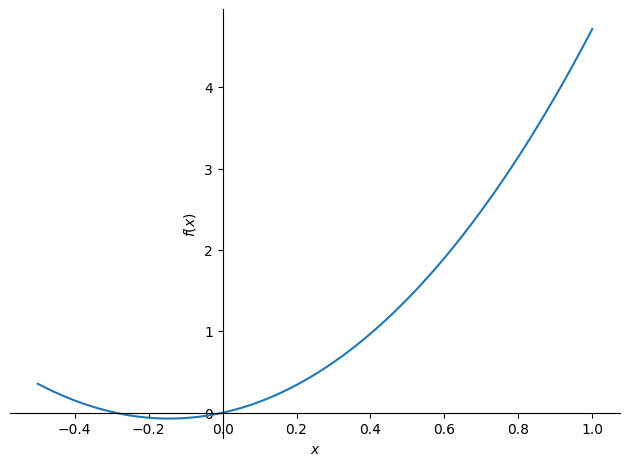

In [459]:
def f6(x):
  return 3*x**2 + sp.exp(x) - 1

a,b,x06=0,1,0
tolerancia=10**-4

sp.plot(f6(x))
sp.plot(f6(x),(x,-0.5,1))

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;

In [460]:
Biseccion(f6,a,b,tolerancia,precision)

Aproximación solicitada:  6.103515625e-05
Número total de iteraciones  14 



[0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625,
 0.00048828125,
 0.000244140625,
 0.0001220703125,
 6.103515625e-05]

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.

In [461]:
NR(f6,x06,tolerancia,precision)

Sale del programa por  tolerancia
Aproximación solicitada:  0
Número total de iteraciones  1 



[0]

5.- Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):

i) $f(x)=x^7-x^4+2$

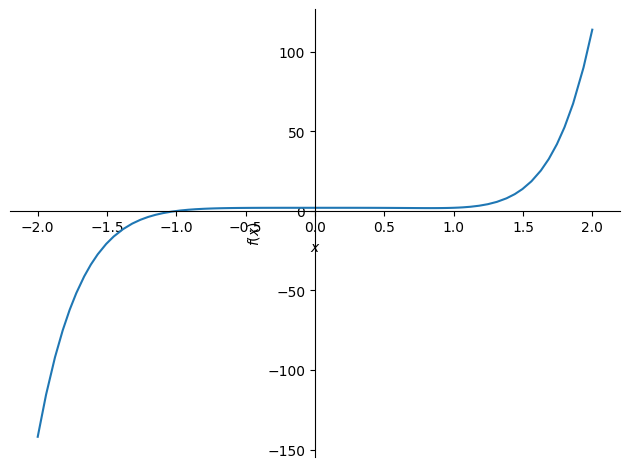

[-1.] 


[-1, CRootOf(x**6 - x**5 + x**4 - 2*x**3 + 2*x**2 - 2*x + 2, 0), CRootOf(x**6 - x**5 + x**4 - 2*x**3 + 2*x**2 - 2*x + 2, 1), CRootOf(x**6 - x**5 + x**4 - 2*x**3 + 2*x**2 - 2*x + 2, 2), CRootOf(x**6 - x**5 + x**4 - 2*x**3 + 2*x**2 - 2*x + 2, 3), CRootOf(x**6 - x**5 + x**4 - 2*x**3 + 2*x**2 - 2*x + 2, 4), CRootOf(x**6 - x**5 + x**4 - 2*x**3 + 2*x**2 - 2*x + 2, 5)] 


-1.00000000000000 




array([ 1.06110281+0.37638405j,  1.06110281-0.37638405j,
        0.15199934+1.01945595j,  0.15199934-1.01945595j,
       -0.71310215+0.98823189j, -0.71310215-0.98823189j,
       -1.        +0.j        ])

In [462]:
def f7(x):
  return x**7-x**4+2

a,b,x07=-2,2,-1
sp.plot(f7(x),(x,a,b))

print (fsolve(f7,x07),"\n\n") #f debe estar definida previamente
print(solve(f7(x),x),"\n\n") #Resolucion simbolica
print(nsolve(f7(x),x,x07),"\n\n") #Resolucion tambien compleja

coefs=[1,0,0,-1,0,0,0,2]
np.roots(coefs) #Resolucion numerica, da todas las soluciones

ii) $f(x)=x^7+\cos  x-3$.

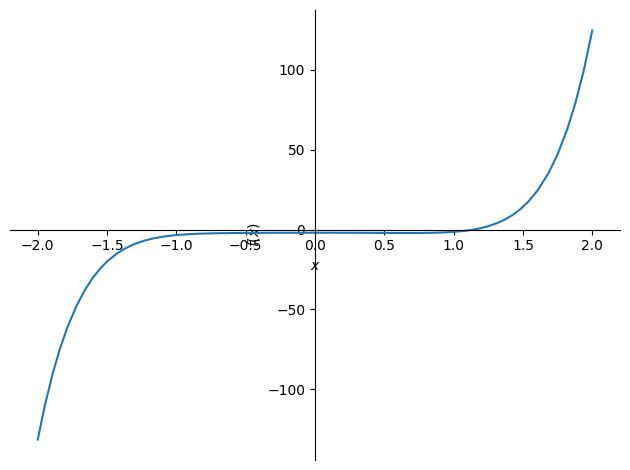

1.14545980727001

In [463]:
def f8(x):
  return x**7 + sp.cos(x) -3

a,b=-2,2
sp.plot(f8(x),(x,a,b))

#fsolve(f8,1)     #Error por ser demasiado compleja
#solve(f8(x),x,1) #Error por ser demasiado compleja
nsolve(f8(x),x,1)

 6.- Aplicar los métodos de aceleración de la convergencia de Aitken y Steffensen (según los apuntes) a las sucesiones obtenidas para los distintos métodos programados en esta práctica y comparar los resultados. Para aplicar el método de aceleración de Steffensen, recuerde que para transformar cualquier ecuación de la forma  $ f(x)=0 $  en un problema de puntos fijos  $ g(x)=x $, la forma más simple puede ser definir  $g(x)=x \pm f(x)$.

In [464]:
tolerancia= 10**-5
precision=10**-16

aproximacionNR=NR(f1,x01,tolerancia,precision)
print("N-R sobre f1:\n",aproximacionNR, "\n\n"
      "Aitken sobre f1:\n", Ac_Aitken(f1,aproximacionNR,tolerancia,precision),"\n\n"
      "Steffensen sobre f1:\n", Ac_Steffensen(f1,x01,tolerancia,precision),"\n\n")

Sale del programa por  tolerancia
Aproximación solicitada:  1.36523001341410
Número total de iteraciones  4 

N-R sobre f1:
 [1.37234042553191, 1.36525467084926, 1.36523001371216, 1.36523001341410] 

Aitken sobre f1:
 [1.36522992761019, 1.36523001341409] 

Steffensen sobre f1:
 [1.3064308989840905, 1.3458441503625176, 1.3626661306730747, 1.3651807584772713, 1.3652299949682376, 1.3652300134140942] 




 7.- Programar el método de Newton-Raphson acelerado, partiendo de cierto $x_0$ adecuado: $$x_{n+1}=x_n - m\frac{f(x_n)}{f'(x_n)}, \quad n=0,1,2,\ldots$$ para el caso de una raíz múltiple (de multiplicidad $m\in\mathbb{N}$) de una ecuación del tipo $f(x)=0$ y comparar los resultados
con los que se obtienen mediante el empleo de los métodos de aceleración habituales de Aitken y Steffensen (según los apuntes).

 8.- Programar el conocido algoritmo de Horner para la evaluación de un polinomio y emplearlo de forma reiterativa para el cálculo del desarrollo de Taylor de orden $ n$ de un polinomio cualquiera. Aprovecharlo también para programar una versión especial del método de Newton-Raphson para polinomios, evaluando tanto  $ p(x_k ) $ como $ p'(x_k)$ mediante el citado algoritmo y aplicarlo para aproximar alguna de las raíces reales del siguiente polinomio

$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
(siendo $d_0, d_1, \ldots, d_7$ los dígitos ordenados de su DNI, pasaporte o tarjeta de residente).

Programar y construir también una sucesión de Sturm para dicho polinomio.

18*x**5 + 5*x**4 + 24*x**3 + 15*x**2 + 10*x + 7


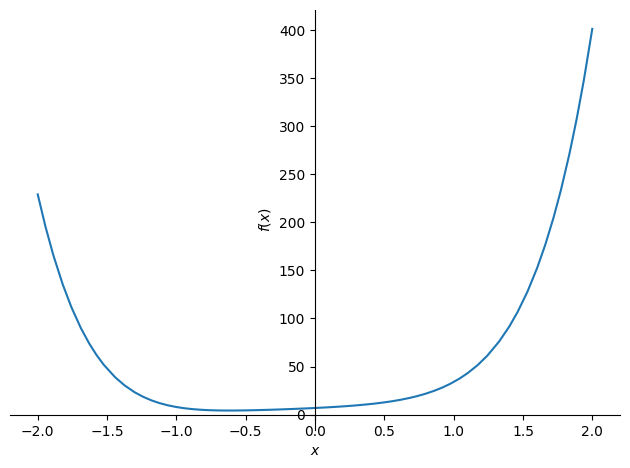

Sale del programa por  
Se llegó al número máximo de iteraciones
Número total de iteraciones  100 

Sucesion de Sturm:
 [3*x**6 + x**5 + 6*x**4 + 5*x**3 + 5*x**2 + 7*x + 7, 18*x**5 + 5*x**4 + 24*x**3 + 15*x**2 + 10*x + 7, -211*x**4/108 - 41*x**3/18 - 115*x**2/36 - 155*x/27 - 749/108, -587952*x**3/44521 + 523260*x**2/44521 + 308232*x/44521 - 2838024/44521, 24944715611*x**2/3200810688 - 93894789*x/59274272 - 19928890709/1600405344, 245226910050432*x/19880938341967 + 979240017833280/19880938341967, -2219620488349079810687/18787814486603797248]


In [465]:
def p(x):
  return 7+7*x+5*x**2+5*x**3+6*x**4+x**5+3*x**6

print(sp.diff(p(x),x))

def dp(x):
  return 7+10*x+15*x**2+24*x**3+5*x**4+18*x**5

tolerancia=10**-5
precision=10**-16

a,b,x0=-2,2,-1
sp.plot(p(x),(x,a,b))

NR_Horner(p,dp,x0,tolerancia,precision) #Mi polinomio no corta

print("Sucesion de Sturm:\n",Suc_Sturm(p))